In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
path = '/Users/malavica/Library/CloudStorage/OneDrive-Personal/Documents/careerfoundry/achviement 4/4'
df_combined=pd.read_pickle(os.path.join(path,'df_cleaned'))

In [3]:
df_combined.dtypes


order_id                   object
user_id                    object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
mean_price                float64
spending_flag              object
median_days_spo           float64
regular_flag               object
gender                     object
state                      object
age                         int64
date_joined                object
number_of_dependents        int64
marital_status             object
income        

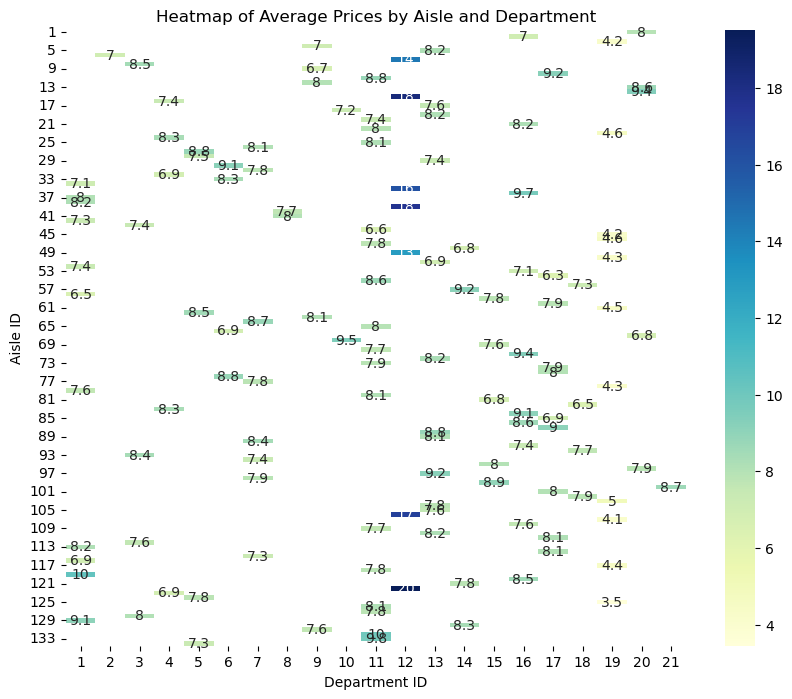

In [15]:
pivot_table = df_combined.pivot_table(index='aisle_id', columns='department_id', values='prices', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Average Prices by Aisle and Department')
plt.xlabel('Department ID')
plt.ylabel('Aisle ID')
plt.show()


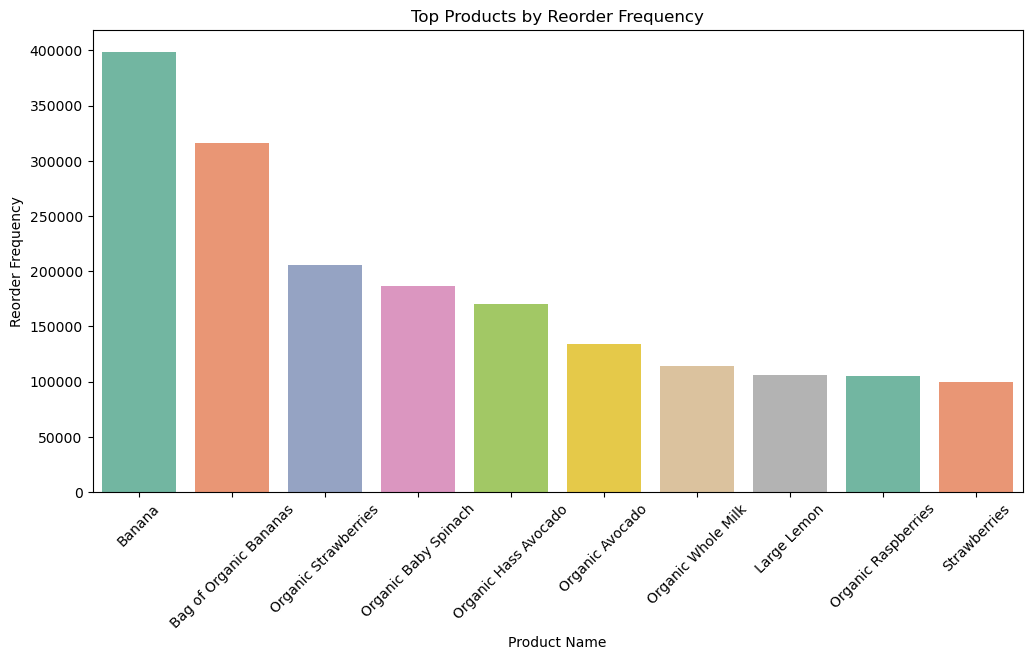

In [4]:
# Calculate reorder frequency for each product
reorder_frequency = df_combined.groupby('product_name')['reordered'].sum().reset_index()

# Sort by reorder frequency and select top N products
top_products = reorder_frequency.sort_values(by='reordered', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='product_name', y='reordered', data=top_products, palette='Set2')
plt.title('Top Products by Reorder Frequency')
plt.xlabel('Product Name')
plt.ylabel('Reorder Frequency')
plt.xticks(rotation=45)
plt.show()

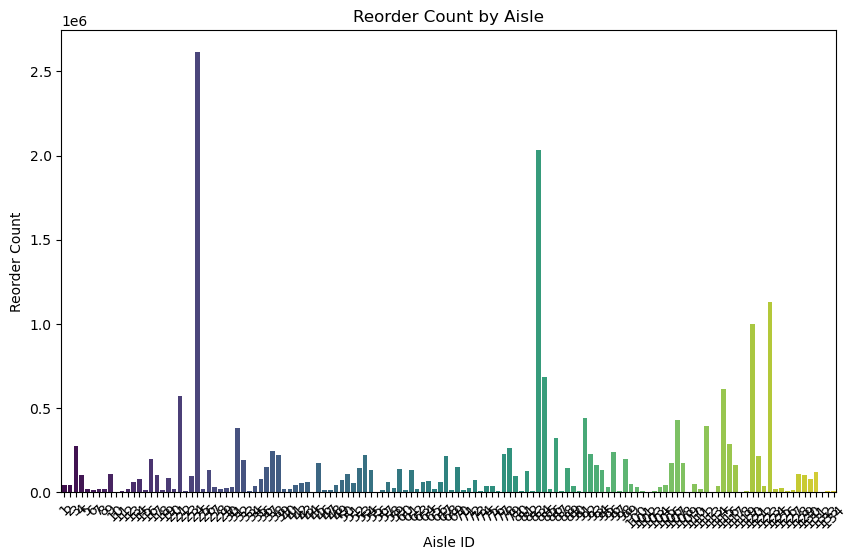

In [8]:
reorder_count_by_aisle = df_combined.groupby('aisle_id')['reordered'].sum().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='aisle_id', y='reordered', data=reorder_count_by_aisle, palette='viridis')
plt.title('Reorder Count by Aisle')
plt.xlabel('Aisle ID')
plt.ylabel('Reorder Count')
plt.xticks(rotation=45)
plt.show()

In [20]:
import pandas as pd

# Assuming df is your dataframe with the data

# 1. Identify High-Price and Low-Price Products
high_price_threshold = df_combined['prices'].quantile(0.75)
low_price_threshold = df_combined['prices'].quantile(0.25)

df_combined['price_category'] = pd.cut(df_combined['prices'], 
                              bins=[0, low_price_threshold, high_price_threshold, df_combined['prices'].max()], 
                              labels=['Low', 'Medium', 'High'])

# 2. Analyze Customer Behavior
loyalty_price_comparison = df_combined.groupby('loyalty_flag')['prices'].mean().reset_index()

# 3. Demographic Analysis
income_price_comparison = df_combined.groupby(pd.qcut(df_combined['income'], q=4, labels=['Low', 'Medium', 'High', 'Very High']))['prices'].mean().reset_index()

# 4. Temporal Analysis
weekday_price_comparison = df_combined.groupby('orders_day_of_week')['prices'].mean().reset_index()
hourly_price_comparison = df_combined.groupby('order_hour_of_day')['prices'].mean().reset_index()

# 5. Reorder Frequency
reorder_price_comparison = df_combined.groupby('reordered')['prices'].mean().reset_index()

# Output the results
print("High-Price and Low-Price Product Thresholds:\n", high_price_threshold, low_price_threshold)
print("\nCustomer Behavior by Loyalty:\n", loyalty_price_comparison)
print("\nAverage Prices by Income Group:\n", income_price_comparison)
print("\nAverage Prices by Day of Week:\n", weekday_price_comparison)
print("\nAverage Prices by Hour of Day:\n", hourly_price_comparison)


High-Price and Low-Price Product Thresholds:
 11.3 4.2

Customer Behavior by Loyalty:
        loyalty_flag    prices
0    Loyal customer  7.773575
1      New customer  7.801206
2  Regular customer  7.798262

Average Prices by Income Group:
       income    prices
0        Low  7.284209
1     Medium  7.957509
2       High  7.965260
3  Very High  7.957140

Average Prices by Day of Week:
    orders_day_of_week    prices
0                   0  7.857590
1                   1  7.759697
2                   2  7.754309
3                   3  7.757485
4                   4  7.756223
5                   5  7.762477
6                   6  7.857431

Average Prices by Hour of Day:
     order_hour_of_day    prices
0                   0  7.811152
1                   1  7.805706
2                   2  7.799211
3                   3  7.828101
4                   4  7.838612
5                   5  7.828162
6                   6  7.817802
7                   7  7.820043
8                   8  7.790509
9 

In [21]:


# Group by user_id and calculate reorder count and total orders for each user
user_stats = df_combined.groupby('user_id').agg(
    total_orders=pd.NamedAgg(column='order_id', aggfunc='nunique'),
    total_reorders=pd.NamedAgg(column='reordered', aggfunc='sum')
)

# Calculate reorder frequency rate for each user
user_stats['reorder_frequency_rate'] = user_stats['total_reorders'] / user_stats['total_orders']

# Display the first few rows of the result
print(user_stats.head())


         total_orders  total_reorders  reorder_frequency_rate
user_id                                                      
1                  10              41                4.100000
10                  5              49                9.800000
100                 5               7                1.400000
1000                7              71               10.142857
10000              72             836               11.611111


In [22]:
import pandas as pd

# Assuming df is DataFrame with order_id and reordered columns

# Calculate the total number of items and the number of reorders
total_items = len(df_combined)
total_reorders = df_combined['reordered'].sum()

# Calculate overall reorder frequency rate
overall_reorder_frequency = total_reorders / total_items

print(f"Overall Reorder Frequency Rate: {overall_reorder_frequency:.2f}")


Overall Reorder Frequency Rate: 0.59


In [24]:


# Define thresholds for high-price and low-price items
high_price_threshold = 25 
low_price_threshold = 1  

# Filter the DataFrame for high-price and low-price items
high_price_items = df_combined[df_combined['prices'] > high_price_threshold]
low_price_items = df_combined[df_combined['prices'] <= low_price_threshold]

# Calculate reorder rates for each category
high_price_reorder_rate = high_price_items['reordered'].mean()
low_price_reorder_rate = low_price_items['reordered'].mean()

print(f"High-Price Item Reorder Rate: {high_price_reorder_rate:.2f}")
print(f"Low-Price Item Reorder Rate: {low_price_reorder_rate:.2f}")


High-Price Item Reorder Rate: nan
Low-Price Item Reorder Rate: 0.59


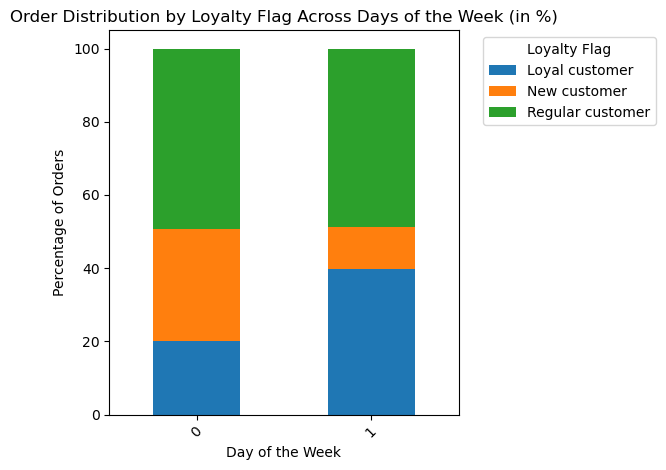

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading - replace this with your actual DataFrame
# df = pd.read_csv('your_data_file.csv')

# Aggregating data
grouped = df_combined.groupby(['reordered', 'loyalty_flag']).size().unstack()

# Convert the counts to percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting the 100% stacked bar chart
percentages.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Order Distribution by Loyalty Flag Across Days of the Week (in %)')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Orders')
plt.xticks(rotation=45)
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting the layout
plt.tight_layout()

# Display the plot
plt.show()


In [3]:
df_combined['orders_day_of_week'] = df_combined['orders_day_of_week'].astype(str)

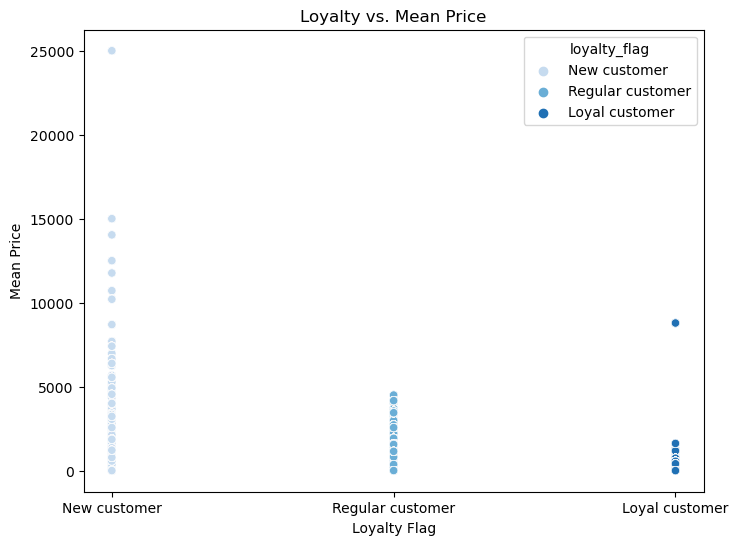

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df_combined, x='loyalty_flag', y='mean_price', hue='loyalty_flag', palette='Blues')
plt.xlabel('Loyalty Flag')
plt.ylabel('Mean Price')
plt.title('Loyalty vs. Mean Price')
plt.show()

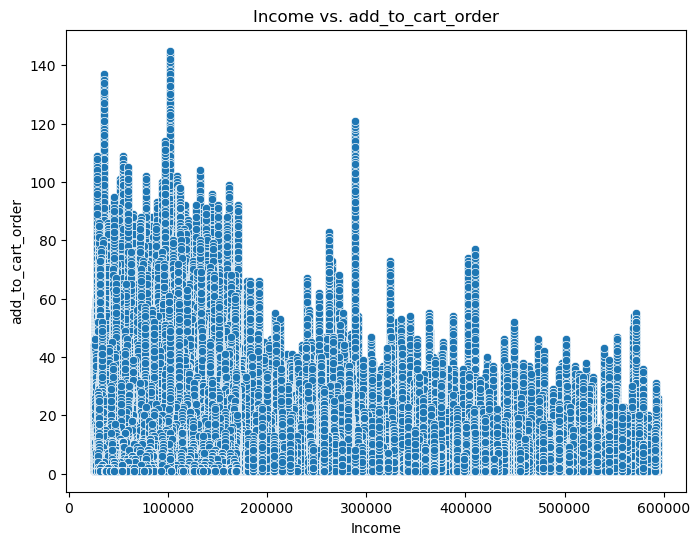

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df_combined, x='income', y='add_to_cart_order')
plt.xlabel('Income')
plt.ylabel('add_to_cart_order')
plt.title('Income vs. add_to_cart_order')
plt.show()

/var/folders/fw/jyn_z_rs3xv413rj90245b9c0000gp/T/ipykernel_20015/524140788.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=income_df, x='income', y='basket_size', palette='Blues')


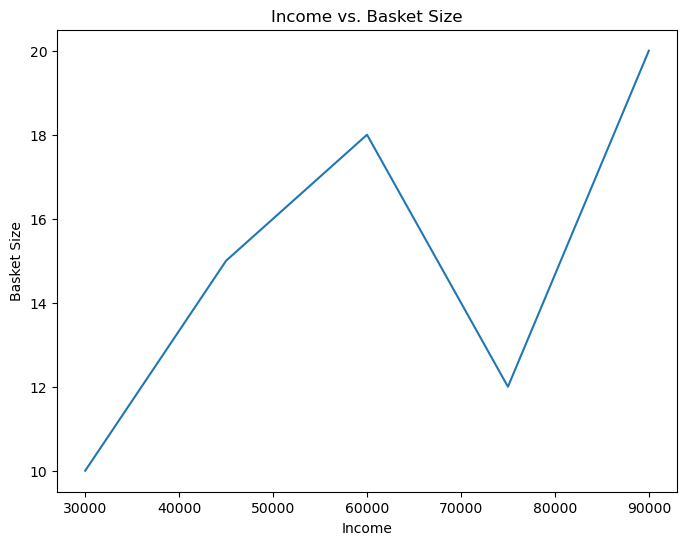

In [31]:
income_data = {
    'income': [30000, 45000, 60000, 75000, 90000],
    'basket_size': [10, 15, 18, 12, 20]
}
income_df = pd.DataFrame(income_data)

plt.figure(figsize=(8, 6))
sns.lineplot(data=income_df, x='income', y='basket_size', palette='Blues')
plt.xlabel('Income')
plt.ylabel('Basket Size')
plt.title('Income vs. Basket Size')
plt.show()


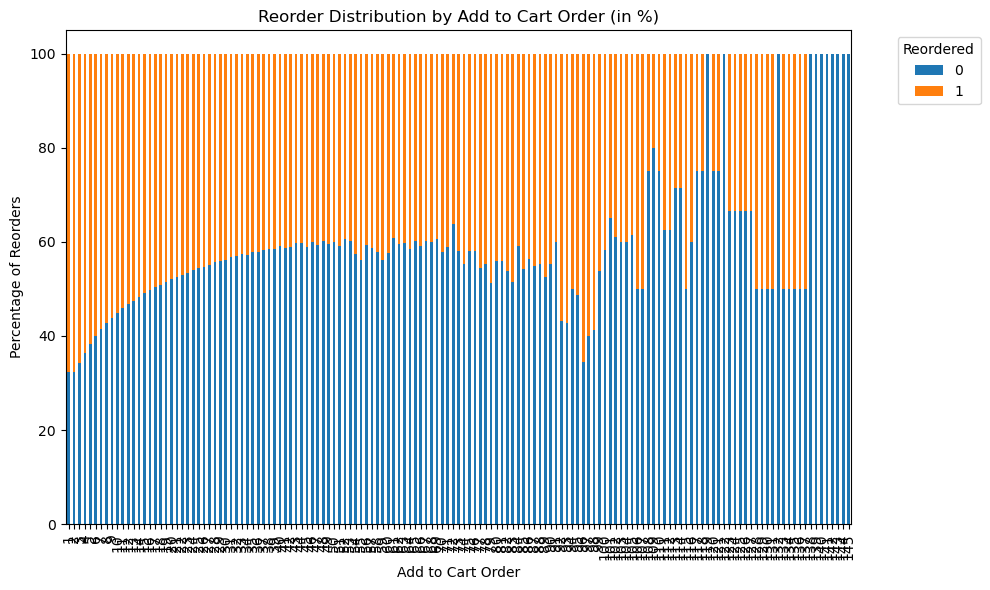

In [44]:
# Aggregating data
grouped = df_combined.groupby(['add_to_cart_order', 'reordered']).size().unstack()

# Convert the counts to percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting the 100% stacked bar chart
percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
plt.title('Reorder Distribution by Add to Cart Order (in %)')
plt.xlabel('Add to Cart Order')
plt.ylabel('Percentage of Reorders')
plt.legend(title='Reordered', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting the layout
plt.tight_layout()

# Display the plot
plt.show()


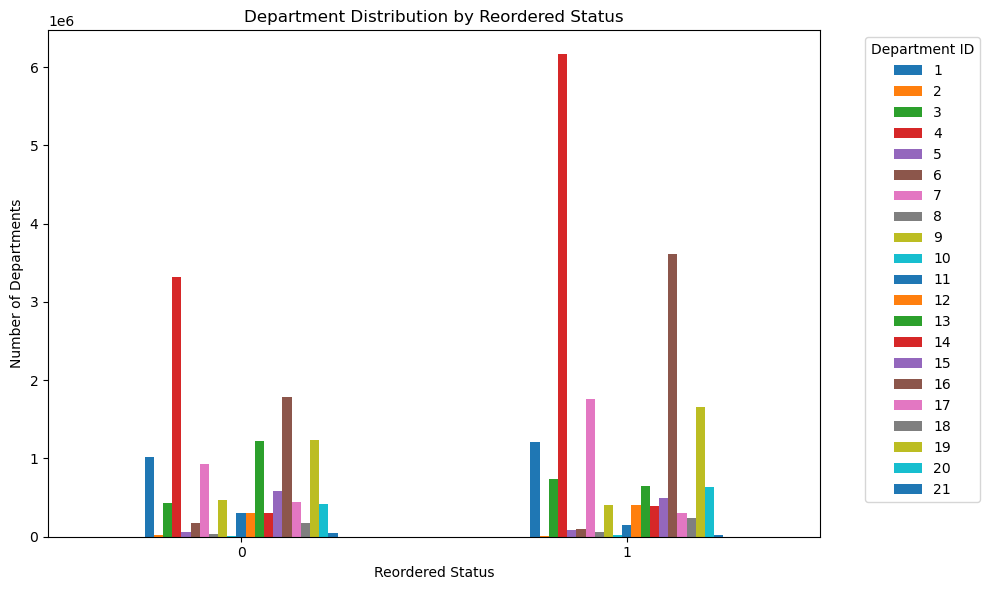

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading - replace this with your actual DataFrame
# df = pd.read_csv('your_data_file.csv')

# Aggregating data
grouped = df_combined.groupby(['reordered', 'department_id']).size().unstack()

# Plotting the bar chart
grouped.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Department Distribution by Reordered Status')
plt.xlabel('Reordered Status')
plt.ylabel('Number of Departments')
plt.xticks(rotation=0)  # You can adjust rotation if needed
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting the layout
plt.tight_layout()

# Display the plot
plt.show()
